In [1]:
import hdfdict
import h5py
import numpy as np

fname = 'frz_multomega_20230329_1130.h5'
f = h5py.File(fname, 'r')
fulldata = hdfdict.load(fname)
h0 = f.attrs['h0']
N = f.attrs['N'] 
nperiods = f.attrs['nperiods']
f.close()
print(h0,N)

1.5707963267948966 100


In [2]:
omegas = np.array([value['metadata']['omega'] for key, value in fulldata.items()])

print(omegas)

[ 0.5  1.5  8.   9.   9.5 10.  20.  40.  60.  90. ]


/usr/local/anaconda3/anaconda3/envs/hpc/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-3.5, 0.1)

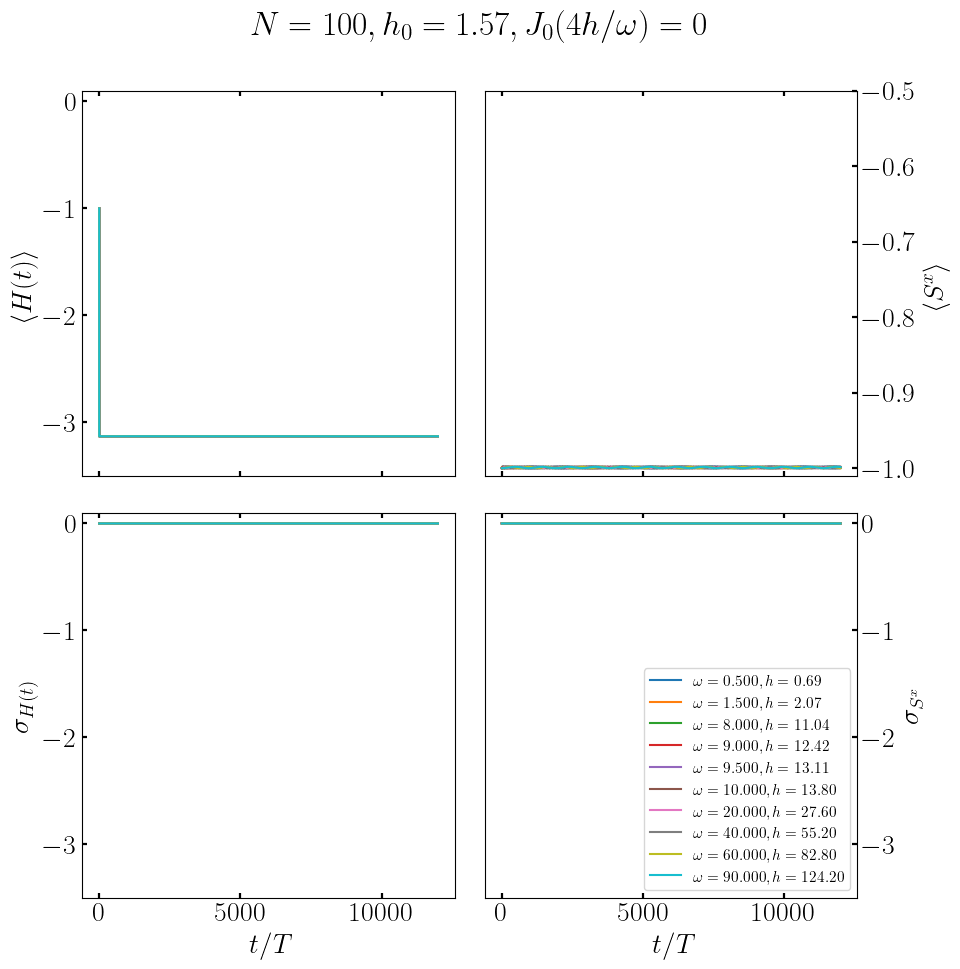

In [3]:
from scipy.special import j0
import matplotlib.pyplot as plt

keys = ['0','1','2','3','4','5','6','7','8','9']

fig,axs = plt.subplots(2,2, tight_layout=True, figsize=(10, 10))

fig.suptitle(fr'$N={N}, h_0={h0:1.2f}, J_0(4h/\omega)=0$')

for key in keys:
    data = fulldata[key]
    omega = data['metadata']['omega']
    h = data['metadata']['h']
    axs[0,0].plot(data['eavg'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[0,1].plot(data['sxavg'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[1,0].plot(data['evar'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    axs[1,1].plot(data['evar'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')


axs[0,0].set_ylabel(r"$\langle H(t) \rangle$")


axs[1,0].set_ylabel(r"$\sigma_{H(t)}$")
axs[1,0].set_xlabel(r"$t/T$")
axs[0,1].set_ylabel(r"$\langle S^x \rangle$")
axs[1,1].set_ylabel(r"$\sigma_{S^x} $")
axs[1,1].set_xlabel(r"$t/T$")
axs[0,1].yaxis.tick_right()
axs[1,1].yaxis.tick_right()
axs[0,1].yaxis.set_label_position("right")
axs[1,1].yaxis.set_label_position("right")
axs[0,0].xaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])
axs[1,1].legend(loc='lower right', fontsize=11)

axs[0,0].set_ylim((-3.5, 0.1))
axs[0,1].set_ylim((-1.01, -0.5))
axs[1,0].set_ylim((-3.5, 0.1))
axs[1,1].set_ylim((-3.5, 0.1))


#get handles and labels
#handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
#order = [2,3,0,5,6,4]

#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

(-0.05, 1.05)

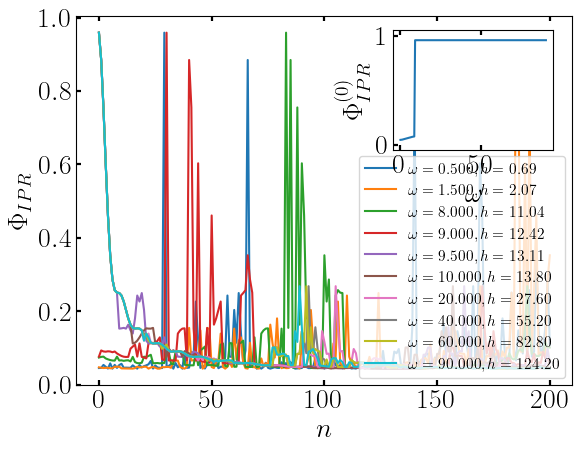

In [5]:
from scipy.special import j0
import matplotlib.pyplot as plt


chosen_state = 0
keys = ['0','1','2','3','4','5','6','7','8','9']

fig, ax1 = plt.subplots()

omegas = []
iprdata = []

for key in keys:
    data = fulldata[key]
    omega = data['metadata']['omega']
    omegas.append(omega)
    h = data['metadata']['h']
    ax1.plot(data['ipr'],label=fr'$\omega={omega:1.3f}, h={h:1.2f}$')
    iprdata.append(data['ipr'][chosen_state])

    
ax1.set_ylabel(r"$\Phi_{IPR}$")
ax1.set_xlabel(r"$n$")
ax1.legend(loc='lower right', fontsize=11)

left, bottom, width, height = [0.62, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(omegas, iprdata)
ax2.set_xlabel(r"$\omega$")

ax2.set_ylabel(r"$\Phi^{(0)}_{IPR}$")
ax2.set_ylim((-0.05,1.05))


#get handles and labels
#handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
#order = [2,3,0,5,6,4]

#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])